In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import analysis
import scipy.optimize as sco
import optimize

In [2]:
sd = dt.datetime(2010,1,1)
ed = dt.datetime(2010,12,31)
syms = ['GOOG', 'AAPL', 'GLD', 'XOM']
allocs = [0.2, 0.3, 0.4, 0.1]
sv=1000000
rfr=0.0
sf=252.0

Start Date: 2010-01-01 00:00:00
End Date: 2010-12-31 00:00:00
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Allocations:  ['0.200', '0.300', '0.400', '0.100']
Sharpe Ratio: 1.518
Volatility (stdev of daily returns): 0.010
Average Daily Return: 0.001
Cumulative Return: 0.256


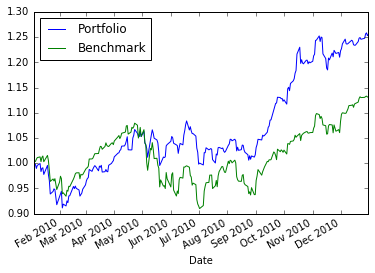

In [3]:
params = analysis.assess_portfolio(sd, ed, syms, allocs, sv, rfr=0.0, sf=252.0, gen_plot=True)

Start Date: 2010-01-01 00:00:00
End Date: 2010-12-31 00:00:00
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Allocations:  ['0.000', '0.420', '0.580', '0.000']
Sharpe Ratio: 2.003
Volatility (stdev of daily returns): 0.010
Average Daily Return: 0.001
Cumulative Return: 0.366


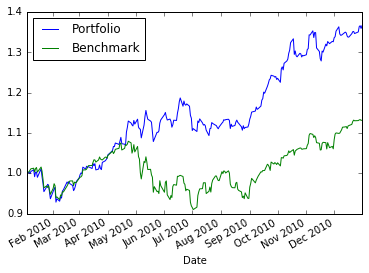

In [4]:
sd = dt.datetime(2010,1,1)
ed = dt.datetime(2010,12,31)
syms = ['GOOG', 'AAPL', 'GLD', 'XOM']

portfolio_values = analysis.get_data(sd, ed, syms)
allocs = optimize.optimize_portfolio(portfolio_values)

params = analysis.assess_portfolio(sd, ed, syms, allocs, sv, rfr=0.0, sf=252.0, gen_plot=True)

Start Date: 2012-01-01 00:00:00
End Date: 2015-01-01 00:00:00
Symbols: ['AXP', 'HPQ', 'IBM', 'HNZ', 'YHOO', 'XOM', 'GLD', 'GOOG', 'AAPL']
Allocations:  ['0.350', '0.049', '0.000', '0.055', '0.369', '0.000', '0.000', '0.000', '0.177']
Sharpe Ratio: 1.739
Volatility (stdev of daily returns): 0.011
Average Daily Return: 0.001
Cumulative Return: 1.333


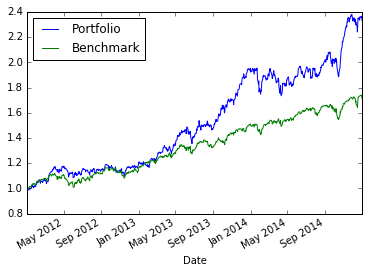

In [5]:
sd = dt.datetime(2012,1,1)
ed = dt.datetime(2015,1,1)
syms = ['AXP', 'HPQ', 'IBM', 'HNZ', 'YHOO', 'XOM', 'GLD', 'GOOG', 'AAPL']

portfolio_values = analysis.get_data(sd, ed, syms)
allocs = optimize.optimize_portfolio(portfolio_values)

params = analysis.assess_portfolio(sd, ed, syms, allocs, sv, rfr=0.0, sf=252.0, gen_plot=True)